In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

#

In [ ]:
!pip install opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alexandroaurellino
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf


100%|██████████| 179M/179M [00:09<00:00, 20.6MB/s]


In [ ]:
# Define the dataset paths
train_dir = '/content/tomatoleaf/tomato/train'
val_dir = '/content/tomatoleaf/tomato/val'

In [ ]:
# Get the class labels
class_labels = os.listdir(train_dir)

# Print each label on a new line
for label in class_labels:
    print(label)

Tomato___Early_blight
Tomato___Bacterial_spot
Tomato___healthy
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Late_blight
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Target_Spot
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot


In [ ]:
# Define the image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 64

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    shuffle=True,
    labels='inferred',
    class_names = class_labels,
    label_mode = 'categorical',
    color_mode='rgb',
    seed=42
)


val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    shuffle=False,
    labels='inferred',
    class_names = class_labels,
    label_mode = 'categorical',
    color_mode='rgb',
    seed=42
)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# Transfer Learning

In [ ]:
pre_trained_model = tf.keras.applications.InceptionV3(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = "imagenet")

In [ ]:
# Freeze all layers initially
for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_282 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_288   │ (None, 111, 111, 32)   │             96 │ conv2d_282[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_282            │ (None, 111, 111, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_283 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_282[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_289   │ (None, 109, 109, 32)   │             96 │ conv2d_283[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_283            │ (None, 109, 109, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_284 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_283[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_290   │ (None, 109, 109, 64)   │            192 │ conv2d_284[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_284            │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 54, 54, 64)     │              0 │ activation_284[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_285 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_291   │ (None, 54, 54, 80)     │            240 │ conv2d_285[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_285            │ (None, 54, 54, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_286 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Choose `mixed8` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed8')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 1280)


In [ ]:
# Use Global Average Pooling instead of Flatten
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# Create the full model
model = tf.keras.Model(pre_trained_model.input, x)

# Print the model summary
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_282 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_288   │ (None, 111, 111, 32)   │             96 │ conv2d_282[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_282            │ (None, 111, 111, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_283 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_282[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_289   │ (None, 109, 109, 32)   │             96 │ conv2d_283[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_283            │ (None, 109, 109, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_284 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_283[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_290   │ (None, 109, 109, 64)   │            192 │ conv2d_284[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_284            │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 54, 54, 64)     │              0 │ activation_284[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_285 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_291   │ (None, 54, 54, 80)     │            240 │ conv2d_285[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_285            │ (None, 54, 54, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_286 (Conv2D)  

 Total params: 12,522,666 (47.77 MB)

 Trainable params: 1,844,746 (7.04 MB)

 Non-trainable params: 10,677,920 (40.73 MB)

In [ ]:
# Create a model with data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),  # Normalize pixel values to [0, 1]
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),  # Optional additional augmentation
])

In [ ]:
# Attach the data augmentation model to the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = model(x)

model_with_aug = tf.keras.Model(inputs, x)

In [ ]:
# Compile the model with the training parameters
base_learning_rate = 0.0001
model_with_aug.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                       loss=tf.keras.losses.CategoricalCrossentropy(),
                       metrics=['accuracy'])

In [ ]:
model_with_aug.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_13 (Functional)           │ (None, 10)                  │      12,522,666 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,522,666 (47.77 MB)

 Trainable params: 1,844,746 (7.04 MB)

 Non-trainable params: 10,677,920 (40.73 MB)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Add this callback
callbacks = [early_stopping, reduce_lr]

# Train the model
history = model_with_aug.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  # Increase the epochs for fine-tuning
    verbose=2,
    callbacks=callbacks
)

Epoch 1/10
157/157 - 36s - 228ms/step - accuracy: 0.5957 - loss: 17.9382 - val_accuracy: 0.5290 - val_loss: 16.7425 - learning_rate: 1.0000e-04
Epoch 2/10
157/157 - 38s - 241ms/step - accuracy: 0.7745 - loss: 14.6846 - val_accuracy: 0.7650 - val_loss: 13.6092 - learning_rate: 1.0000e-04
Epoch 3/10
157/157 - 25s - 159ms/step - accuracy: 0.8182 - loss: 12.3399 - val_accuracy: 0.8370 - val_loss: 11.3417 - learning_rate: 1.0000e-04
Epoch 4/10
157/157 - 41s - 259ms/step - accuracy: 0.8439 - loss: 10.4697 - val_accuracy: 0.8390 - val_loss: 9.6771 - learning_rate: 1.0000e-04
Epoch 5/10
157/157 - 25s - 160ms/step - accuracy: 0.8589 - loss: 8.9568 - val_accuracy: 0.8560 - val_loss: 8.3001 - learning_rate: 1.0000e-04
Epoch 6/10
157/157 - 40s - 257ms/step - accuracy: 0.8732 - loss: 7.6896 - val_accuracy: 0.8190 - val_loss: 7.2938 - learning_rate: 1.0000e-04
Epoch 7/10
157/157 - 42s - 265ms/step - accuracy: 0.8734 - loss: 6.6555 - val_accuracy: 0.8910 - val_loss: 6.2084 - learning_rate: 1.0000e-04

In [ ]:
# Step 8: Unfreeze layers from 'mixed7' onward
for layer in pre_trained_model.layers:
    layer.trainable = False  # Re-freeze all layers initially

# Unfreeze layers from `mixed7` onward
for layer in pre_trained_model.layers[pre_trained_model.layers.index(pre_trained_model.get_layer('mixed7')):]:
    layer.trainable = True

In [ ]:
# Step 9: Recompile the model with a lower learning rate
model_with_aug.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# Step 10: Fine-tune the model
history_fine_tuning = model_with_aug.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    verbose=2,
    callbacks=callbacks
)

Epoch 1/10
157/157 - 40s - 254ms/step - accuracy: 0.9065 - loss: 4.0468 - val_accuracy: 0.8920 - val_loss: 4.0071 - learning_rate: 1.0000e-05
Epoch 2/10
157/157 - 39s - 246ms/step - accuracy: 0.9053 - loss: 3.9269 - val_accuracy: 0.8920 - val_loss: 3.9023 - learning_rate: 1.0000e-05
Epoch 3/10
157/157 - 41s - 259ms/step - accuracy: 0.9107 - loss: 3.8181 - val_accuracy: 0.8900 - val_loss: 3.8105 - learning_rate: 1.0000e-05
Epoch 4/10
157/157 - 28s - 181ms/step - accuracy: 0.9171 - loss: 3.7158 - val_accuracy: 0.8920 - val_loss: 3.7183 - learning_rate: 1.0000e-05
Epoch 5/10
157/157 - 29s - 182ms/step - accuracy: 0.9168 - loss: 3.6356 - val_accuracy: 0.8940 - val_loss: 3.6369 - learning_rate: 1.0000e-05
Epoch 6/10
157/157 - 41s - 260ms/step - accuracy: 0.9163 - loss: 3.5605 - val_accuracy: 0.9030 - val_loss: 3.5574 - learning_rate: 1.0000e-05
Epoch 7/10
157/157 - 29s - 182ms/step - accuracy: 0.9190 - loss: 3.4884 - val_accuracy: 0.9070 - val_loss: 3.4965 - learning_rate: 1.0000e-05
Epoch 

In [ ]:
# Step 11: Evaluate and save the final model
val_loss, val_acc = model_with_aug.evaluate(val_dataset)
print(f"Fine-tuned Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8652 - loss: 3.4102
Fine-tuned Validation Accuracy: 0.8990, Validation Loss: 3.3299


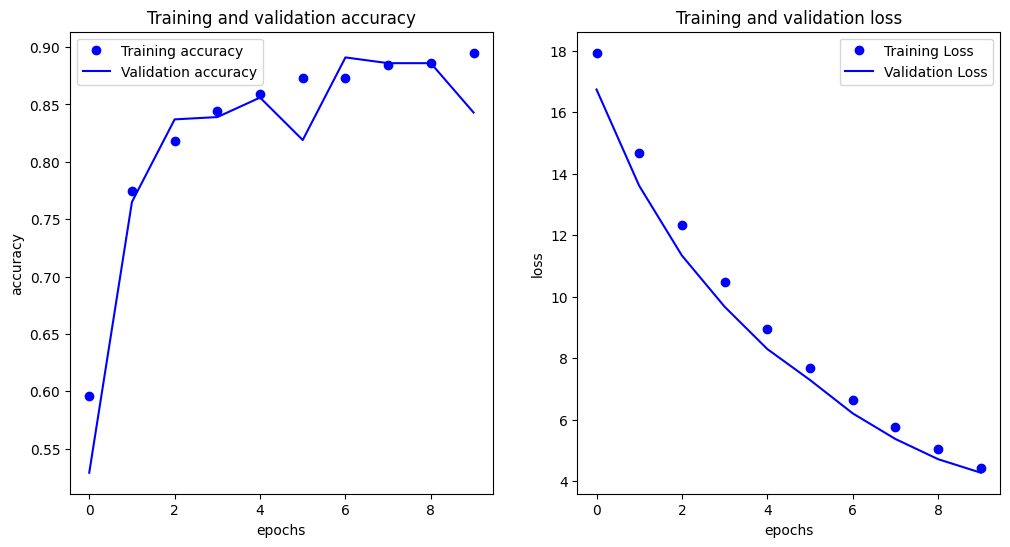

In [ ]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

plot_loss_acc(history)

In [ ]:
model_without_aug = tf.keras.Model(inputs=model_with_aug.input, outputs=model_with_aug.output)
model_without_aug.save('/content/drive/MyDrive/Capstone/model_tomato_classification_V1_tfjs/Tomato_InceptionV3_V1_2.keras')